### 1. Generate the ring data shown on Slide 65 using the following method:

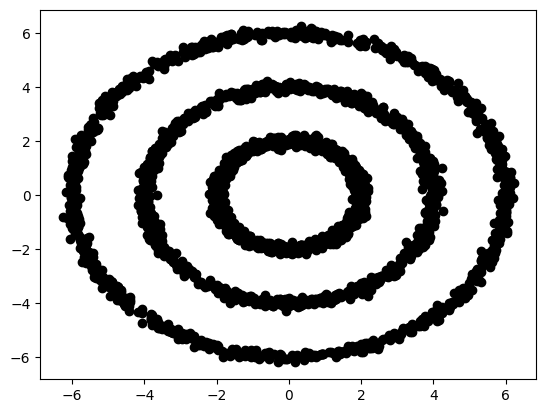

In [128]:
import numpy as np
import matplotlib.pyplot as plt


def generate_circle_sample_data(r, n, sigma):

    """Generate circle data with random Gaussian noise."""

    angles = np.random.uniform(low=0, high=2*np.pi, size=n)

    x_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

    y_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

    x = r*np.cos(angles) + x_epsilon

    y = r*np.sin(angles) + y_epsilon

    return x, y


r = [2, 4, 6]
n = 1000
sigma = 0.1

X = generate_circle_sample_data(r[0], n, sigma)
Y = generate_circle_sample_data(r[1], n, sigma)
Z = generate_circle_sample_data(r[2], n, sigma)

A = np.concatenate((X, Y), axis=1)
B = np.concatenate((A, Z), axis=1)

C = np.vstack((B[0],B[1])).T


plt.scatter(B[0], B[1], c='#000000')
plt.show()

### 2. Import SpectralClustering from sklearn.cluster and cluster the data generated in step 1. Consider the number of clusters to be 3. Plot the clusters using colour as shown on Slide 65.


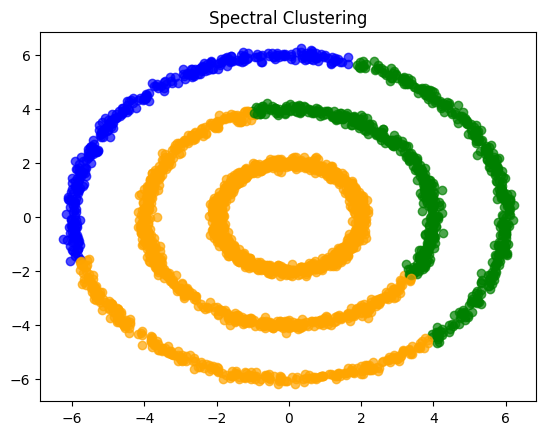

In [129]:
from sklearn.cluster import SpectralClustering

def plot_spect(C):


    clustering = SpectralClustering(n_clusters=3).fit(C)

    for i in range(0, len(clustering.labels_)):
        if clustering.labels_[i] == 0:
            plt.scatter(C[i,0],C[i,1], c="blue", alpha=.7)
        elif clustering.labels_[i] == 1:
            plt.scatter(C[i,0],C[i,1], c="orange", alpha=.7)
        elif clustering.labels_[i] == 2:
            plt.scatter(C[i,0],C[i,1], c="green", alpha=.7)
    plt.title("Spectral Clustering")
    plt.show()

plot_spect(C)


### 3. Install fuzzy c-means from PyPI (fuzzy-c-means · PyPI) and run it on the circle data.

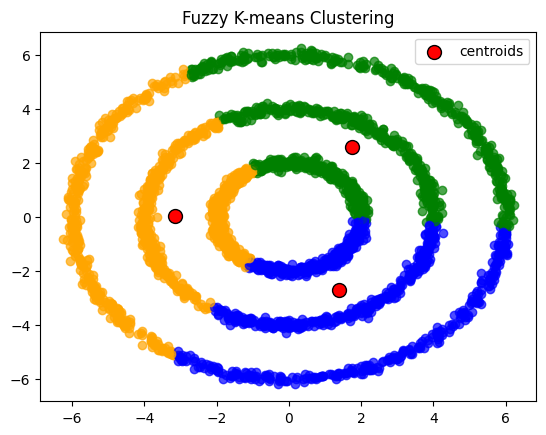

In [130]:
from fcmeans import FCM

def plot_fuzz(C):

    fcm = FCM(n_clusters=3)
    fcm.fit(C)
    fcm_centers = fcm.centers
    fcm_labels = fcm.predict(C)

    for i in range(0, len(fcm_labels)):
        if fcm_labels[i] == 0:
            plt.scatter(C[i,0],C[i,1], c="blue", alpha=.7)
        elif fcm_labels[i] == 1:
            plt.scatter(C[i,0],C[i,1], c="orange", alpha=.7)
        elif fcm_labels[i] == 2:
            plt.scatter(C[i,0],C[i,1], c="green", alpha=.7)

    # plot the centroids
    plt.scatter(
        fcm_centers[:, 0], fcm_centers[:, 1],
        s=100, marker='o',
        color='red',
        edgecolor='black',
        label='centroids'
    )
    plt.legend()
    plt.title("Fuzzy K-means Clustering")
    plt.show()

plot_fuzz(C)

|First Image|Second Image|
|:-:|:-:|
|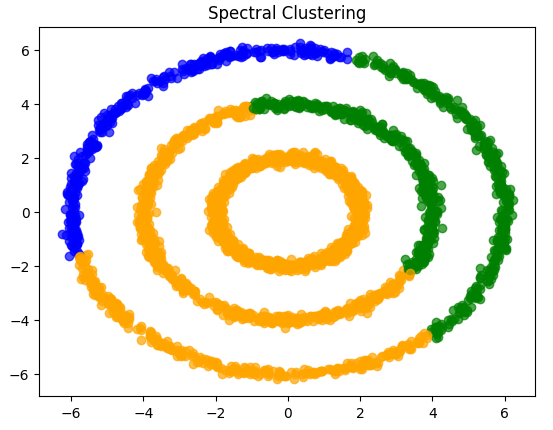|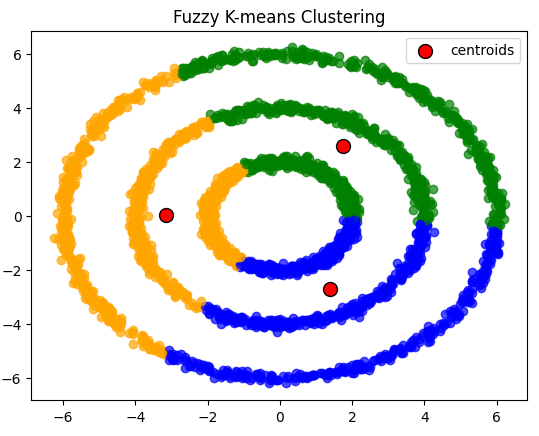|

## Conclusions

- Spectral Clustering tends to recognize the circular pattern, where Fuzzy K-means doesn't
- Fuzzy K-means centroids are simmetrically distant and the clusters are equally split
- Spectral Clustering does not have an equal split, one cluster having more/less data points than the others